In [ ]:
!pip install tweepy
!pip install emoji --upgrade
!pip install contractions
!pip install nltk
!pip install vaderSentiment
!pip install googletrans
!pip install googletrans==4.0.0rc1
!pip install wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
consumer_key='dTI3XCBryEevpI1BKdDiVrMIK'
consumer_secret='pk9rkbjlyl5Au6ml3jUqQmujvK3Wq3EwgLqYZ6BYV8vs5Iogin'
bearer_token='AAAAAAAAAAAAAAAAAAAAAFOSfQEAAAAADvM8dn2QL%2B3I07%2FIUHafwYxTN1E%3Deys3UMIlFm4Qy9as8AZBf1KpeXMFvqBZoTJS0Sa8QYuXgVFXF2'
access_token='1238262319710375939-XXjejiPeaCFKoxOUkp4QYsh1DtJVPZ'
acces_secret='kIZKaCuaREnnOciq4QbWeKJd9Fhhn4BPmdymKEQAFzafA'


In [ ]:
consumer_key='dTI3XCBryEevpI1BKdDiVrMIK'
consumer_secret='pk9rkbjlyl5Au6ml3jUqQmujvK3Wq3EwgLqYZ6BYV8vs5Iogin'
bearer_token='AAAAAAAAAAAAAAAAAAAAAFOSfQEAAAAADvM8dn2QL%2B3I07%2FIUHafwYxTN1E%3Deys3UMIlFm4Qy9as8AZBf1KpeXMFvqBZoTJS0Sa8QYuXgVFXF2'
access_token='1238262319710375939-XXjejiPeaCFKoxOUkp4QYsh1DtJVPZ'
acces_secret='kIZKaCuaREnnOciq4QbWeKJd9Fhhn4BPmdymKEQAFzafA'

In [ ]:
#DATA COLLECTION/SCRAPING
import tweepy
import pandas as pd
import os

#BERT
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#api = tweepy.API(auth)
api = tweepy.API(auth,wait_on_rate_limit=True)

#df = pd.DataFrame(columns=['text', 'source', 'url', 'date_created'])
msgs = []
temp=[]
count=0


for tweet in tweepy.Cursor(api.search_tweets,q='Malaria',tweet_mode='extended').items(200000):
   #msg = [tweet.text, tweet.source, tweet.source_url, tweet.created_at]
   #msg = tuple(msg)
   #x=api.update_status(status=tweet.text)
   #status = api.get_status(tweet.id,tweet_mode='extended')
   #user = api.get_user(status.user.id_str)
   msg={
        "text":tweet.full_text,
        "source":tweet.source,
        "link":tweet.source_url,
        "time":tweet.created_at,
        "Language": tweet.lang,
        "Location:":tweet.user.location
        }


   msgs.append(msg)
   temp.append(msg)
   """
   if len(msgs)%10==0:
     df1 = pd.DataFrame(temp)
     df1.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/MPdata.csv', sep=',', mode='a', encoding='utf-8', until )
     count=count+10
     temp.clear()
     if count%1000==0:
       print(count, "tweets")


df = pd.DataFrame(msgs)

    """

In [ ]:
len(msgs)
#msgs

38623

In [ ]:
#df = pd.DataFrame(msgs)
#mode ='a',
#df.head()
#until='2022-11-20',

In [ ]:
df = pd.DataFrame(msgs)
df.to_csv('/content/drive/MyDrive/ColabNotebooks/NLP/Malaria.csv', sep=',', mode='a', encoding='utf-8')

In [ ]:
string = "grrks FOR grrks"

# replace all instances of 'r' (old) with 'e' (new)
new_string = string.replace("r", "e" )

print(string)
print(new_string)

grrks FOR grrks
geeks FOR geeks


In [ ]:
#Packages
import pandas as pd
import numpy as np
import re
import emoji
import contractions

In [ ]:
#read Data
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/NLP/MPout.xlsx')
df.columns

Index(['Unnamed: 0', 'text', 'source', 'link', 'time', 'Language',
       'Translate'],
      dtype='object')

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/NLP/MP1.csv')
df.columns

Index(['Unnamed: 0', 'text', 'source', 'link', 'time', 'Language'], dtype='object')

In [ ]:
#Check Total
print("Number of tweets: {}".format(len(df)))

Number of tweets: 10096


In [ ]:
#df=df.iloc[:100000,1:]

In [ ]:
df=df.drop_duplicates(subset="text", keep='first')
len(df)


5237

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/MP1.csv', sep=',', encoding='utf-8')

In [ ]:
#df1 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/NLP/CP.csv', on_bad_lines='skip', lineterminator='\n')
df['time'].max()


Timestamp('2022-11-06 23:59:57')

In [ ]:
#df1=df1.iloc[:100000,1:]

In [ ]:
#df['Label']=df1['Label']


In [ ]:
#count language
df['Language'].value_counts()

en     91998
pt      3389
und     2536
es      2219
fr      2181
       ...  
gl         1
tt         1
jv         1
uk         1
km         1
Name: Language, Length: 103, dtype: int64

In [ ]:
df.shape

(200000, 6)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `SECTION 2` Text Normalization

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [ ]:
tweet = df['Translate']

In [ ]:
tweet.head()

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT Tag and User Tag

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

* Remove  `@_Someone_`

In [ ]:
def replace_retweet(tweet, default_replace=""):
  tweet=str(tweet)
  #remove RT
  tweet = re.sub('(RT|rt|Rt)\s+', default_replace, tweet)
  #Romove Username
  tweet=re.sub("@[A-Za-z0-9_:]+",default_replace, tweet)
  tweet=re.sub(r'[^\x1F-\x7F]+', '', str(x[100]))
  return tweet

In [ ]:
#print("Processed tweet: {}".format(replace_retweet(tweet)))
data=[]
for val in tweet[0]:
    #print(val)
    x=replace_retweet(val)
    data.append(x)
tweet=pd.DataFrame(data)


In [ ]:
tweet.head(10)

In [ ]:
#Remove Emoji
data1=[]
for val in tweet[0]:
    #print(val)
    x=emoji.demojize(val)
    data1.append(x)
tweet=pd.DataFrame(data1)

In [ ]:
tweet.head(10)



In [ ]:
data1=[]
for val in tweet[0]:
    #Remove URL
    x = re.sub('(http|https):\/\/\S+', "", val)
    #Remove Nextline
    x = re.sub('\n+', "", val)
    #x = re.sub('https+', "", val)
    #x = re.sub('co+', "", val)
    #x = re.sub('t+', "", val)
    data1.append(x)
tweet=pd.DataFrame(data1)

In [ ]:
tweet.head(10)

,0
0,#monkeypox #variola Symptoms: I started feeli...
1,"Currently in Georgia, Black men are dispropor..."
2,#monkeypox #variola Symptoms: I started feeli...
3,Georgia â€” If you're concerned about Monkeyp...
4,The CDC just added 799 new confirmed monkeypo...
5,Monkeypox is not an STD and can be transmitte...
6,#breaking The Rio Grande Valley confirms its ...
7,the dog was earned a small one after sharing ...
8,#monkeypox #variola Symptoms: I started feeli...
9,Georgia â€” If you're concerned about Monkeyp...


In [ ]:
data1=[]
for val in tweet[0]:
      #remove Hashtag
    x = re.sub('#+', "", val)
    data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,Monkeypox? I'm afraid of no. I don't even leav...
1,4) When Demetre's not dropping science on mon...
2,Vaccine preventable illnesses:MeaslesMumps Ru...
3,That Monkeypox idea FAILED terribly.
4,WH monkeypox coordinator Demetre Daskalakis: ...
5,Global reported monkeypox cases continue to d...
6,We are clear that MaÃ ± Ana will present a me...
7,monkeypox ð_x009f_¤_x009d_ VDVunclear airborn...
8,Anthony Edwards gonna be doing a monkeypox PS...
9,Los Angeles Officials RepoSecond U.S. Monkeyp...


In [ ]:
data1=[]
for val in tweet[0]:
      #remove Hashtag
    x = re.sub('https+', "", val)
    data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,Monkeypox? I'm afraid of no. I don't even leav...
1,4) When Demetre's not dropping science on mon...
2,Vaccine preventable illnesses:MeaslesMumps Ru...
3,That Monkeypox idea FAILED terribly.
4,WH monkeypox coordinator Demetre Daskalakis: ...
5,Global reported monkeypox cases continue to d...
6,We are clear that MaÃ ± Ana will present a me...
7,monkeypox ð_x009f_¤_x009d_ VDVunclear airborn...
8,Anthony Edwards gonna be doing a monkeypox PS...
9,Los Angeles Officials RepoSecond U.S. Monkeyp...


In [ ]:
#Change all text to lower Case
data1=[]
for val in tweet[0]:
  x= val.lower()
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)


,0
0,monkeypox? i'm afraid of no. i don't even leav...
1,4) when demetre's not dropping science on mon...
2,vaccine preventable illnesses:measlesmumps ru...
3,that monkeypox idea failed terribly.
4,wh monkeypox coordinator demetre daskalakis: ...
5,global reported monkeypox cases continue to d...
6,we are clear that maã ± ana will present a me...
7,monkeypox ð_x009f_¤_x009d_ vdvunclear airborn...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u.s. monkeyp...


In [ ]:
data1=[]
for val in tweet[0]:
      #Remove Numerals
    x = re.sub('[0-9:?=.""]+', " ", val)
    data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that maã ± ana will present a me...
7,monkeypox ð_x f_¤_x d_ vdvunclear airborne ca...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
#remove Duplicates
print("Before:", len(tweet))
#tweet.drop_duplicates(inplace = True)
print("After:", len(tweet))

Before: 107336
After: 107336


In [ ]:
#Remove Panctuation
data1=[]
for val in tweet[0]:
  x=re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that maã ± ana will present a me...
7,monkeypox ð_x f_¤_x d_ vdvunclear airborne ca...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/clean1.csv', sep=',', mode='a', encoding='utf-8')

In [ ]:
#Remove Word Repetition
data1=[]
for val in tweet[0]:
  x=re.sub(r'(.)\1+', r'\1\1', val)
  #x = re.sub('https+', "", val)
  #x = re.sub('&amp+', "", val)
  #x = re.sub('€+', "", val)
  #x = re.sub('_+', "", val)
  #x = re.sub('+', "", val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that maã ± ana will present a me...
7,monkeypox ð_x f_¤_x d_ vdvunclear airborne ca...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
#Remove Word Repetition
data1=[]
for val in tweet[0]:

  x = re.sub('_+', "", val)
 #x = re.sub('.', "", val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that maã ± ana will present a me...
7,monkeypox ðx f¤x d vdvunclear airborne capabi...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:

data1=[]
for val in tweet[0]:

  x = re.sub('//t+', "", val)
 #x = re.sub('.', "", val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that maã ± ana will present a me...
7,monkeypox ðx f¤x d vdvunclear airborne capabi...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
data1=[]
for val in tweet[0]:

  x = re.sub('¦+', "", val)
 #x = re.sub('.', "", val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that maã ± ana will present a me...
7,monkeypox ðx f¤x d vdvunclear airborne capabi...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
data1=[]
for val in tweet[0]:

  x = re.sub('co/+', "", val)
 #x = re.sub('.', "", val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that maã ± ana will present a me...
7,monkeypox ðx f¤x d vdvunclear airborne capabi...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
data1=[]
for val in tweet[0]:

  x = re.sub('ã+', "", val)
 #x = re.sub('.', "", val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that ma ± ana will present a med...
7,monkeypox ðx f¤x d vdvunclear airborne capabi...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
data1=[]
for val in tweet[0]:

  x = re.sub(',+', "", val)
 #x = re.sub('.', "", val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that ma ± ana will present a med...
7,monkeypox ðx f¤x d vdvunclear airborne capabi...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
#Remove Word Repetition
data1=[]
for val in tweet[0]:

  x = re.sub('&amp+', "", val)
  x = re.sub('€+', "", val)

  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i'm afraid of no i don't even leav...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that ma ± ana will present a med...
7,monkeypox ðx f¤x d vdvunclear airborne capabi...
8,anthony edwards gonna be doing a monkeypox ps...
9,los angeles officials reposecond u s monkeyp...


In [ ]:
#Contractions
data1=[]
for val in tweet[0]:
  x=contractions.fix(val)
  data1.append(x)
tweet=pd.DataFrame(data1)
tweet.head(10)

,0
0,monkeypox i am afraid of no i do not even le...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...
5,global reported monkeypox cases continue to d...
6,we are clear that ma ± ana will present a med...
7,monkeypox ðx f¤x d vdvunclear airborne capabi...
8,anthony edwards going to be doing a monkeypox...
9,los angeles officials reposecond you s monke...


In [ ]:
tweet["text"]=tweet[0]
tweet = tweet.drop(0, axis=1)
tweet.head()


,text
0,monkeypox i am afraid of no i do not even le...
1,) when demetre's not dropping science on mon...
2,vaccine preventable illnesses measlesmumps ru...
3,that monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...


# **SECTION 2 Text Normalization (SIMPLIFIED VERSION)**

In [ ]:
#Remove Emoji
for i, row in df.iterrows():
  #Remove Emoji
  x=emoji.demojize(str(row['Translate']))

  #Remove The Rweet tag
  x = re.sub('(RT|rt|Rt)\s+', "", str(x))

  #Romove Username
  x=re.sub("@[A-Za-z0-9_:]+","", str(x))

  #Remove URL
  x = re.sub('(http|https):\/\/\S+', "", str(x))

  #remove contraction
  x=contractions.fix(x)

  #Remove Non-Ascii character
  x=re.sub(r'[^\x1F-\x7F]+', r'', str(x))

  #remove non letter
  x=re.sub('\W', ' ', str(x))

  #Remove Number and unbderscore
  x=re.sub('[0-9_]+', ' ', str(x))

  #remove single word
  x=re.sub(r"\b[a-zA-Z]\b", "",str(x))

  #remove word repetition
  x=re.sub(r'(.)\1+', r'\1\1', str(x))

  #Remove Space
  x=re.sub(r"/^[^ ][\w\W ]*[^ ]/", "",str(x))






  df.loc[i, "CleanText"]=x.lower()

# VADER **IMPLEMENTATION**

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
#VADER IMPLEMENTATION

for i, row in tweet.iterrows():
  sentiment_dict = sid.polarity_scores(row[0])
  if sentiment_dict['compound'] >= 0.05 :
    lab="Positive"
  elif sentiment_dict['compound'] <= - 0.05 :
    lab="Negative"
  else :
    lab="Neutral"
  tweet.loc[i, "Label"]=lab


In [ ]:
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/MPout_Polarity.csv', sep=',', encoding='utf-8')
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NLP/MPout_Polarity.csv")

In [ ]:
df =df.drop('label', axis=1)

In [ ]:
#tweet['Label']=df['Label']

In [ ]:
 tweet_Label=tweet
 tweet1=tweet

In [ ]:
tweet_Label.head()

,text,Label
0,monkeypox i am afraid of no i do not even le...,Negative
1,) when demetre's not dropping science on mon...,Positive
2,vaccine preventable illnesses measlesmumps ru...,Negative
3,that monkeypox idea failed terribly,Negative
4,wh monkeypox coordinator demetre daskalakis ...,Neutral


In [ ]:
tweet1.tail(10)

,text,Label
107326,a review of dr daskalakis’s social media pre...,Neutral
107327,canada confirms monkeypox cases blyknjxdp...,Neutral
107328,how to protect yourself from monkeypox cjeox ...,Positive
107329,researchers find link between monkeypox and m...,Neutral
107330,seriously wtf! covid monkeypox and now polio ...,Negative
107331,how to know if guatemala is within the countr...,Neutral
107332,ability trumps what you wear in your private ...,Positive
107333,monkeypox facts; pa of sfv checks; hertzberg ...,Positive
107334,bannon the depth of the depravity of this reg...,Negative
107335,all the monkeypox contributors get a governme...,Neutral


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

,Unnamed: 0,text,source,link,time,Language,Translate
0,0.0,Monkeypox? Tenho medo nÃ£o. Eu nem saio de cas...,Twitter Web App,https://mobile.twitter.com,2022-09-11 21:26:00,pt,Monkeypox? I'm afraid of no. I don't even leav...
1,1.0,RT @tomselliott: 4) When Demetre's not droppin...,Twitter for iPhone,http://twitter.com/download/iphone,2022-09-11 21:26:00,en,RT @tomselliott: 4) When Demetre's not droppin...
2,2.0,RT @JReinerMD: Vaccine preventable illnesses:\...,Twitter for iPhone,http://twitter.com/download/iphone,2022-09-11 21:26:00,en,RT @JReinerMD: Vaccine preventable illnesses:\...
3,3.0,RT @Jaresh012: That Monkeypox idea FAILED terr...,Twitter for Android,http://twitter.com/download/android,2022-09-11 21:26:00,en,RT @Jaresh012: That Monkeypox idea FAILED terr...
4,4.0,RT @tomselliott: WH monkeypox coordinator Deme...,Twitter for iPhone,http://twitter.com/download/iphone,2022-09-11 21:25:00,en,RT @tomselliott: WH monkeypox coordinator Deme...


In [ ]:
stopwordlist = ['a', 'x', '-', 'fx', 'âx', 'if', 'ðx','in','about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
tweet1['tweet_without_stopwords'] = tweet1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwordlist)]))

In [ ]:
tweet1.head()

,text,Label,tweet_without_stopwords
0,monkeypox i am afraid of no i do not even le...,Negative,monkeypox afraid no not even leave home hpzxav...
1,) when demetre's not dropping science on mon...,Positive,) demetre's not dropping science monkeypox hap...
2,vaccine preventable illnesses measlesmumps ru...,Negative,vaccine preventable illnesses measlesmumps rub...
3,that monkeypox idea failed terribly,Negative,monkeypox idea failed terribly
4,wh monkeypox coordinator demetre daskalakis ...,Neutral,wh monkeypox coordinator demetre daskalakis si...


In [ ]:
#Tokenizing
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweet1['tokenized_sents'] = tweet1.apply(lambda row: word_tokenize(row[2]), axis=1)

In [ ]:
#tweet = tweet1.drop("text", axis=1)
tweet1.head()


,text,Label,tweet_without_stopwords,tokenized_sents
0,monkeypox i am afraid of no i do not even le...,Negative,monkeypox afraid no not even leave home hpzxav...,"[monkeypox, afraid, no, not, even, leave, home..."
1,) when demetre's not dropping science on mon...,Positive,) demetre's not dropping science monkeypox hap...,"[), demetre, 's, not, dropping, science, monke..."
2,vaccine preventable illnesses measlesmumps ru...,Negative,vaccine preventable illnesses measlesmumps rub...,"[vaccine, preventable, illnesses, measlesmumps..."
3,that monkeypox idea failed terribly,Negative,monkeypox idea failed terribly,"[monkeypox, idea, failed, terribly]"
4,wh monkeypox coordinator demetre daskalakis ...,Neutral,wh monkeypox coordinator demetre daskalakis si...,"[wh, monkeypox, coordinator, demetre, daskalak..."


In [ ]:
tweet.head()

,text,Label,tweet_without_stopwords,tokenized_sents
0,monkeypox i am afraid of no i do not even le...,Negative,monkeypox afraid no not even leave home hpzxav...,"[monkeypox, afraid, no, not, even, leave, home..."
1,) when demetre's not dropping science on mon...,Positive,) demetre's not dropping science monkeypox hap...,"[), demetre, 's, not, dropping, science, monke..."
2,vaccine preventable illnesses measlesmumps ru...,Negative,vaccine preventable illnesses measlesmumps rub...,"[vaccine, preventable, illnesses, measlesmumps..."
3,that monkeypox idea failed terribly,Negative,monkeypox idea failed terribly,"[monkeypox, idea, failed, terribly]"
4,wh monkeypox coordinator demetre daskalakis ...,Neutral,wh monkeypox coordinator demetre daskalakis si...,"[wh, monkeypox, coordinator, demetre, daskalak..."


In [ ]:
#STEMMING
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
# Use English stemmer.
stemmer = SnowballStemmer("english")

In [ ]:
tweet['stemmed'] = tweet1['tokenized_sents'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#df = df.drop(columns=['unstemmed']) # Get rid of the unstemmed column.
tweet.head()

,text,Label,tweet_without_stopwords,tokenized_sents,stemmed
0,monkeypox i am afraid of no i do not even le...,Negative,monkeypox afraid no not even leave home hpzxav...,"[monkeypox, afraid, no, not, even, leave, home...","[monkeypox, afraid, no, not, even, leav, home,..."
1,) when demetre's not dropping science on mon...,Positive,) demetre's not dropping science monkeypox hap...,"[), demetre, 's, not, dropping, science, monke...","[), demetr, 's, not, drop, scienc, monkeypox, ..."
2,vaccine preventable illnesses measlesmumps ru...,Negative,vaccine preventable illnesses measlesmumps rub...,"[vaccine, preventable, illnesses, measlesmumps...","[vaccin, prevent, ill, measlesmump, rubelladip..."
3,that monkeypox idea failed terribly,Negative,monkeypox idea failed terribly,"[monkeypox, idea, failed, terribly]","[monkeypox, idea, fail, terribl]"
4,wh monkeypox coordinator demetre daskalakis ...,Neutral,wh monkeypox coordinator demetre daskalakis si...,"[wh, monkeypox, coordinator, demetre, daskalak...","[wh, monkeypox, coordin, demetr, daskalaki, si..."


In [ ]:
pos=tweet[tweet['Label']=="Positive"]
neg=tweet[tweet['Label']=="Negative"]
Neu=tweet[tweet['Label']=="Neutral"]

In [ ]:
#Text Bolb
pos=df[df['LabelTB']=="Positive"]
neg=df[df['LabelTB']=="Negative"]
Neu=df[df['LabelTB']=="Neutral"]

In [ ]:
len(tweet)

107336

In [ ]:
print("Postive:", len(pos))
print("Negative:", len(neg))
print("Neutral:", len(Neu))

Postive: 39594
Negative: 14788
Neutral: 52954


In [ ]:
neg.head()
pos.head()

In [ ]:
neg1=neg['tweet_without_stopwords']
pos1=pos['tweet_without_stopwords']
neu=Neu['tweet_without_stopwords']

In [ ]:
data1=[]
for val in neg1:
      #remove Hashtag
    x = re.sub('https+', "", val)
    #x = re.sub('co+', "", val)
    data1.append(x)
neg=pd.DataFrame(data1)
neg.head(10)

,0
0,monkeypox afraid no not even leave home hpzxav...
1,vaccine preventable illnesses measlesmumps rub...
2,monkeypox idea failed terribly
3,los angeles officials reposecond monkeypox dea...
4,los angeles officials reposecond monkeypox dea...
5,sept new york concurrent states emergency covi...
6,monkeypox shit flopped terriblyðx
7,meme literally killed -myopinion groomers sect...
8,survived pandemic killed millions protests str...
9,nothing answer nothing convince mass infection...


In [ ]:
data1=[]
for val in neu:
      #Neutral Cleaup
    x = re.sub('https+', "", val)
    x = re.sub('nan+', "", val)

    #x = re.sub('co+', "", val)
    data1.append(x)
neu=pd.DataFrame(data1)
neu.head(10)

,0
0,wh monkeypox coordinator demetre daskalakis si...
1,monkeypox f¤x vdvunclear airborne capabilities
2,anthony edwards going monkeypox psa saucy sant...
3,dragiwebdo nâ ° monkeypox (has) atrial fibrill...
4,meet demetre daskalakis demetre appointed joe ...
5,hrokymtfe
6,smoking therefore story monkeypox vaccine left...
7,covid monkeypox | communicate week monitoring ...
8,health officials racing determine source local...
9,first time resurrected lumberyard bar get seco...


In [ ]:
data1=[]
for val in pos1:
      #Neutral Cleaup
    x = re.sub('https+', "", val)
    #x = re.sub('+', "", val)

    #x = re.sub('co+', "", val)
    data1.append(x)
pos=pd.DataFrame(data1)
pos.head(10)

,0
0,) demetre's not dropping science monkeypox hap...
1,global reported monkeypox cases continue decli...
2,clear ± ana present medical certificate covid ...
3,heâx got monkeypox sure
4,last yearback (mid/early pandemic) feeling cex...
5,states reporting highest number cases include ...
6,fact pornstars better impact public health age...
7,friend said teacher told parents school still ...
8,first monkeypox case confirmed serology promin...
9,hopefully itâx monkeypox


In [ ]:
df['tweet_without_stopwords']

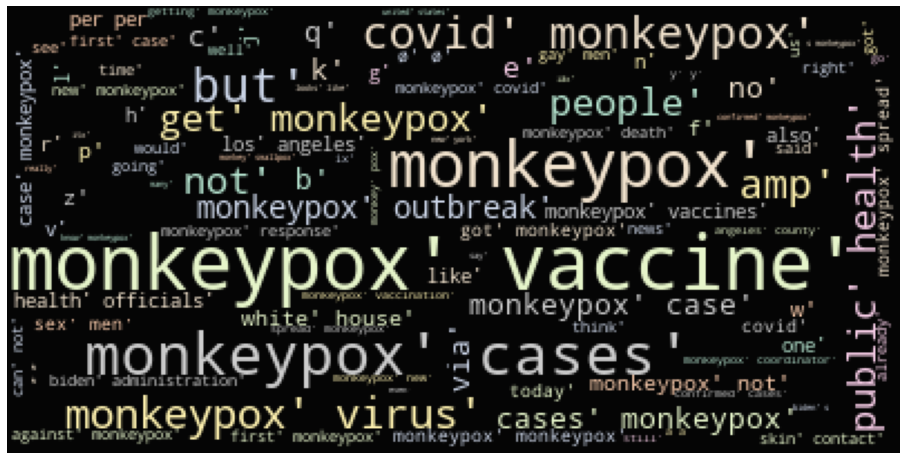

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS


def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black", stopwords=stopwords,max_words=100, max_font_size=50)
    wc.generate(words)
    #plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')




#print("Creating word clouds...")
#positive_words=" ".join(pos[0].values)
#negative_words=" ".join(neg[0].values)
#neutral_words=" ".join(neu[0].values)
all_words=" ".join(i for i in df['tokenized_sents'].values)
#generate_wordcloud(positive_words,0)
#generate_wordcloud(negative_words,0)
generate_wordcloud(all_words,0)



In [ ]:
data1=[]
#po=tweet["tweet_without_stopwords"]
for val in tweet["tweet_without_stopwords"]:
      #remove Hashtag
    x = re.sub('https+', "", val)
    x = re.sub('&amp+', "", val)
    x = re.sub('€+', "", val)
    x = re.sub('_+', "", val)
    x = re.sub('1+', "", val)


    #x = re.sub('co+', "", val)
    data1.append(x)
#po=pd.DataFrame(data1)
#po.head(10)

In [ ]:
import itertools
words_in_tweet = [tweet.lower().split() for tweet in tweet["tweet_without_stopwords"] if tweet is not np.nan]
all_words_no_urls = list(itertools.chain(*words_in_tweet))
count = Counter(all_words_no_urls)
count.most_common(30)
#print(words_in_tweet)

[('monkeypox', 79489),
 ('not', 10750),
 ('vaccine', 8741),
 ('cases', 8589),
 ('health', 6745),
 ('covid', 6409),
 ('new', 6086),
 ('but', 4600),
 ('people', 4528),
 ('first', 4458),
 ('case', 4420),
 ('get', 4267),
 ('us', 3995),
 ('virus', 3802),
 ('like', 3394),
 ('confirmed', 3326),
 ('gay', 3185),
 ('no', 2962),
 ('men', 2936),
 ('know', 2845),
 ('spread', 2823),
 ('&amp;', 2652),
 ('outbreak', 2569),
 ('vaccines', 2533),
 ('sex', 2464),
 ('county', 2444),
 ('one', 2439),
 ('got', 2420),
 ('public', 2303),
 ('news', 2238)]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/NLP/clean1.csv', on_bad_lines='skip')

In [ ]:
np.random.seed(500)

In [ ]:
df.head()

,Unnamed: 0,text,Label,tweet_without_stopwords,tokenized_sents,stemmed,lemma,labelTB,LabelTB
0,0,monkeypox i am afraid of no i do not even le...,Negative,monkeypox afraid no not even leave home hpzxav...,"['monkeypox', 'afraid', 'no', 'not', 'even', '...","['monkeypox', 'afraid', 'no', 'not', 'even', '...","['monkeypox','afraid','no','not','even','leave...",-0.60,Negative
1,1,) when demetre's not dropping science on mon...,Positive,) demetre's not dropping science monkeypox hap...,"[')', 'demetre', ""'s"", 'not', 'dropping', 'sci...","[')', 'demetr', ""'s"", 'not', 'drop', 'scienc',...","[')','demetre',""'s"",'not','dropping','science'...",0.70,Positive
2,2,vaccine preventable illnesses measlesmumps ru...,Negative,vaccine preventable illnesses measlesmumps rub...,"['vaccine', 'preventable', 'illnesses', 'measl...","['vaccin', 'prevent', 'ill', 'measlesmump', 'r...","['vaccine','preventable','illnesses','measlesm...",0.00,Neutral
3,3,that monkeypox idea failed terribly,Negative,monkeypox idea failed terribly,"['monkeypox', 'idea', 'failed', 'terribly']","['monkeypox', 'idea', 'fail', 'terribl']","['monkeypox','idea','failed','terribly']",-0.75,Negative
4,4,wh monkeypox coordinator demetre daskalakis ...,Neutral,wh monkeypox coordinator demetre daskalakis si...,"['wh', 'monkeypox', 'coordinator', 'demetre', ...","['wh', 'monkeypox', 'coordin', 'demetr', 'dask...","['wh','monkeypox','coordinator','demetre','das...",0.00,Neutral


In [ ]:
#LEMMATIZATION
import nltk
nltk.download('wordnet')
from textblob import Word
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
#df['lema'] = df['tokenized_sents'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
df['lemma'] = df['tokenized_sents'].apply(lambda x: "".join([Word(word).lemmatize('v') for word in x.split()]))
df.head()

In [ ]:
# TEXT BOLB LABELLING
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
for i, row in df.iterrows():
  label = TextBlob(str(row['text']))
  #x=label.sentiment.polarity
  '''if x > 0 and x <= 1 :
    lab="Positive"
  elif x >= -1 and x < 0 :
    lab="Negative"
  else :
    lab="Neutral"
    '''
  df.loc[i, "LabelTB1"]=label.classify()


In [ ]:
df = df.drop(columns=['labelTB'])
#df =df.drop('Unnamed: 0', axis=1)


In [ ]:
df.head()

,Unnamed: 0,text,Label,tweet_without_stopwords,tokenized_sents,stemmed,lemma,LabelTB
0,0,monkeypox i am afraid of no i do not even le...,Negative,monkeypox afraid no not even leave home hpzxav...,"['monkeypox', 'afraid', 'no', 'not', 'even', '...","['monkeypox', 'afraid', 'no', 'not', 'even', '...","['monkeypox','afraid','no','not','even','leave...",Negative
1,1,) when demetre's not dropping science on mon...,Positive,) demetre's not dropping science monkeypox hap...,"[')', 'demetre', ""'s"", 'not', 'dropping', 'sci...","[')', 'demetr', ""'s"", 'not', 'drop', 'scienc',...","[')','demetre',""'s"",'not','dropping','science'...",Positive
2,2,vaccine preventable illnesses measlesmumps ru...,Negative,vaccine preventable illnesses measlesmumps rub...,"['vaccine', 'preventable', 'illnesses', 'measl...","['vaccin', 'prevent', 'ill', 'measlesmump', 'r...","['vaccine','preventable','illnesses','measlesm...",Neutral
3,3,that monkeypox idea failed terribly,Negative,monkeypox idea failed terribly,"['monkeypox', 'idea', 'failed', 'terribly']","['monkeypox', 'idea', 'fail', 'terribl']","['monkeypox','idea','failed','terribly']",Negative
4,4,wh monkeypox coordinator demetre daskalakis ...,Neutral,wh monkeypox coordinator demetre daskalakis si...,"['wh', 'monkeypox', 'coordinator', 'demetre', ...","['wh', 'monkeypox', 'coordin', 'demetr', 'dask...","['wh','monkeypox','coordinator','demetre','das...",Neutral


In [ ]:
y=df["Label"]
x=df["stemmed"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
le=LabelEncoder()
le.fit(y)
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

print('Number of tweets in the total set : {}'.format(len(x)))
print('Number of tweets in the training set : {}'.format(len(X_train)))
print('Number of tweets in the testing set : {}'.format(len(X_test)))

Number of tweets in the total set : 107336
Number of tweets in the training set : 85868
Number of tweets in the testing set : 21468


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

# **COUNTVECTORIZER MODEL**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# cv = CountVectorizer()
#cvx_train = cv.fit_transform(X_train).toarray()
#cvx_test = cv.transform(X_test).toarray()
#cvx_train = cv.fit_transform(X_train)
x = cv.fit_transform(x)
#cvx_test = cv.transform(X_test)
# print(cv.get_feature_names())


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
#logistic = LogisticRegression(max_iter=200,random_state=0)
logistic = LogisticRegression(solver='saga', tol=1e-4, max_iter=200,random_state=0)
distributions = dict(C=np.arange(0, 0.5, 0.1),penalty=['l2', 'l1'])
#distributions = dict(C = np.arange(0, 1, 0.01) penalty=['l2', 'l1', 'elasticnet',None],solver=['liblinear', 'newton-cg', 'lbfgs', 'sag','saga'],tol=['1e-2','1e-4','1e-6','1e-0','1e-8']
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(x,y)
clf.cv_results_
df = pd.DataFrame(clf.cv_results_)
#df[['param_C','param_kernel','mean_test_score']]
#search.best_params_
print(df)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:858: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:320: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:858: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:320: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:858: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:320: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
/usr/local/lib/python3

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_penalty  \
0       0.234859      0.007520         0.000000        0.000000            l2   
1      59.132833      0.675907         0.028021        0.000926            l1   
2      20.321741      0.675291         0.028048        0.000913            l2   
3     252.261691     13.880409         0.028365        0.000489            l1   
4      21.332817      0.307602         0.027752        0.000266            l2   
5     481.672053     24.886513         0.029751        0.001389            l1   
6      23.251621      1.625341         0.031000        0.002278            l2   
7     691.203658     31.357180         0.028082        0.000117            l1   
8      21.410187      0.554023         0.028164        0.000321            l2   
9     909.313845     40.149289         0.028565        0.000305            l1   

  param_C                                       params  split0_test_score  \
0     0.0                  {'pe

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=10000 )
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(cvx_train,y_train)
print("lr accuracy: ",lr.score(cvx_test,y_test))
y_test_pred = lr.predict(cvx_test)
print_score(y_test, y_test_pred, train=False)
print("lr train accuracy: ",lr.score(cvx_train,y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


lr accuracy:  0.8951462642071921
Test Result:
Accuracy Score: 89.51%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.849842      0.896383     0.908204  0.895146      0.884810   
recall        0.725152      0.952412     0.882056  0.895146      0.853207   
f1-score      0.782561      0.923549     0.894939  0.895146      0.867016   
support    2958.000000  10591.000000  7919.000000  0.895146  21468.000000   

           weighted avg  
precision      0.894331  
recall         0.895146  
f1-score       0.893569  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 2145   465   348]
 [  146 10087   358]
 [  233   701  6985]]

lr train accuracy:  0.9568756696324591


In [ ]:
#Random Forest
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
classifier.fit(cvx_train,y_train)
y_test_pred = classifier.predict(cvx_test)
print_score(y_test, y_test_pred, train=False)

Test Result:
Accuracy Score: 90.62%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.918105      0.890165     0.926980  0.906186      0.911750   
recall        0.701149      0.973374     0.892916  0.906186      0.855813   
f1-score      0.795093      0.929912     0.909629  0.906186      0.878211   
support    2958.000000  10591.000000  7919.000000  0.906186  21468.000000   

           weighted avg  
precision      0.907595  
recall         0.906186  
f1-score       0.903854  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 2074   543   341]
 [   66 10309   216]
 [  119   729  7071]]



In [ ]:
#NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(cvx_train,y_train)
y_test_pred = nb.predict(cvx_test)
print_score(y_test, y_test_pred, train=False)

Test Result:
Accuracy Score: 81.09%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.835922      0.874650     0.738476  0.810881      0.816349   
recall        0.418526      0.855160     0.898219  0.810881      0.723969   
f1-score      0.557783      0.864795     0.810552  0.810881      0.744377   
support    2958.000000  10591.000000  7919.000000  0.810881  21468.000000   

           weighted avg  
precision      0.819083  
recall         0.810881  
f1-score       0.802484  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[1238  613 1107]
 [ 122 9057 1412]
 [ 121  685 7113]]



In [ ]:
#MLP CLASSIFIER
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

# Create model object
mlp = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
mlp.fit(cvx_train,y_train)
y_test_pred = mlp.predict(cvx_test)
print_score(y_test, y_test_pred, train=False)

Iteration 1, loss = 0.63869243
Iteration 2, loss = 0.25821087
Iteration 3, loss = 0.14600460
Iteration 4, loss = 0.10534107
Iteration 5, loss = 0.08739389
Iteration 6, loss = 0.07782888
Iteration 7, loss = 0.07125297
Iteration 8, loss = 0.07036713
Iteration 9, loss = 0.06401829
Iteration 10, loss = 0.06172942
Iteration 11, loss = 0.06258908
Iteration 12, loss = 0.06183404
Iteration 13, loss = 0.05865575
Iteration 14, loss = 0.05516451
Iteration 15, loss = 0.05445769
Iteration 16, loss = 0.05462306
Iteration 17, loss = 0.05423226
Iteration 18, loss = 0.05497610
Iteration 19, loss = 0.05295504
Iteration 20, loss = 0.05092949
Iteration 21, loss = 0.04939513
Iteration 22, loss = 0.05115969
Iteration 23, loss = 0.04885010
Iteration 24, loss = 0.04964604
Iteration 25, loss = 0.05008648
Iteration 26, loss = 0.05032030
Iteration 27, loss = 0.04578213
Iteration 28, loss = 0.04417622
Iteration 29, loss = 0.04685469
Iteration 30, loss = 0.04745327
Iteration 31, loss = 0.04717314
Iteration 32, los

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(cvx_train,y_train)
y_test_pred = knn.predict(cvx_test)
print_score(y_test, y_test_pred, train=False)

Test Result:
Accuracy Score: 70.05%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.755051      0.639401     0.964823  0.700484      0.786425   
recall        0.505409      0.975734     0.405228  0.700484      0.628790   
f1-score      0.605508      0.772549     0.570743  0.700484      0.649600   
support    2958.000000  10591.000000  7919.000000  0.700484  21468.000000   

           weighted avg  
precision      0.775376  
recall         0.700484  
f1-score       0.675092  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 1495  1415    48]
 [  188 10334    69]
 [  297  4413  3209]]



In [ ]:
# SVM
from sklearn import  svm
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(cvx_train,y_train)
# predict the labels on validation dataset
y_test_pred1 = SVM.predict(cvx_test)
print_score(y_test, y_test_pred1, train=False)

Test Result:
Accuracy Score: 90.50%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.830466      0.917618     0.914090  0.905021      0.887391   
recall        0.783300      0.948636     0.892158  0.905021      0.874698   
f1-score      0.806193      0.932869     0.902991  0.905021      0.880684   
support    2958.000000  10591.000000  7919.000000  0.905021  21468.000000   

           weighted avg  
precision      0.904308  
recall         0.905021  
f1-score       0.904394  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 2317   328   313]
 [  193 10047   351]
 [  280   574  7065]]



In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
# xgb_clf.fit(tfX_train, y_train, eval_metric='aucpr')
xgb_clf.fit(cvx_train, y_train)

y_test_pred = xgb_clf.predict(cvx_test)
print_score(y_test, y_test_pred, train=False)
print("xgb_clf train accuracy: ",xgb_clf.score(cvx_train,y_train))

Test Result:
Accuracy Score: 73.46%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.824176      0.672232     0.906082  0.734628      0.800830   
recall        0.228195      0.980833     0.594520  0.734628      0.601182   
f1-score      0.357427      0.797727     0.717957  0.734628      0.624370   
support    2958.000000  10591.000000  7919.000000  0.734628  21468.000000   

           weighted avg  
precision      0.779429  
recall         0.734628  
f1-score       0.707634  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[  675  1968   315]
 [   30 10388   173]
 [  114  3097  4708]]

xgb_clf train accuracy:  0.7360483532864397


# **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization=TfidfVectorizer()
tfX_train=vectorization.fit_transform(X_train)
tfX_test=vectorization.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
# xgb_clf.fit(tfX_train, y_train, eval_metric='aucpr')
xgb_clf = XGBClassifier()
xgb_clf.fit(tfX_train, y_train)

y_test_pred = xgb_clf.predict(tfX_test)
print_score(y_test, y_test_pred, train=False)
print("xgb_clf train accuracy: ",xgb_clf.score(tfX_train,y_train))
print("lr accuracy: ",xgb_clf.score(tfX_test,y_test))

Test Result:
Accuracy Score: 73.30%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.832321      0.670600     0.905745  0.733045      0.802888   
recall        0.231575      0.982060     0.587322  0.733045      0.600319   
f1-score      0.362338      0.796981     0.712579  0.733045      0.623966   
support    2958.000000  10591.000000  7919.000000  0.733045  21468.000000   

           weighted avg  
precision      0.779622  
recall         0.733045  
f1-score       0.705959  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[  685  1955   318]
 [   24 10401   166]
 [  114  3154  4651]]

xgb_clf train accuracy:  0.7358853123398705
lr accuracy:  0.7330445313955655


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(tfX_train,y_train)
print("lr accuracy: ",lr.score(tfX_test,y_test))
y_test_pred = lr.predict(tfX_test)
print_score(y_test, y_test_pred, train=False)
print("lr train accuracy: ",lr.score(tfX_train,y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


lr accuracy:  0.8800074529532327
Test Result:
Accuracy Score: 88.00%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.852659      0.875890     0.894386  0.880007      0.874312   
recall        0.661258      0.952224     0.865134  0.880007      0.826205   
f1-score      0.744859      0.912463     0.879517  0.880007      0.845613   
support    2958.000000  10591.000000  7919.000000  0.880007  21468.000000   

           weighted avg  
precision      0.879512  
recall         0.880007  
f1-score       0.877217  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 1956   582   420]
 [  117 10085   389]
 [  221   847  6851]]

lr train accuracy:  0.9087087157031724


In [ ]:
#Random Forest
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
classifier.fit(tfX_train,y_train)
y_test_pred = classifier.predict(tfX_test)
print_score(y_test, y_test_pred, train=False)

Test Result:
Accuracy Score: 90.05%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.921751      0.884791     0.918205  0.900456      0.908249   
recall        0.669033      0.971674     0.891653  0.900456      0.844120   
f1-score      0.775318      0.926199     0.904734  0.900456      0.868751   
support    2958.000000  10591.000000  7919.000000  0.900456  21468.000000   

           weighted avg  
precision      0.902209  
recall         0.900456  
f1-score       0.897492  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 1979   593   386]
 [   57 10291   243]
 [  111   747  7061]]



In [ ]:
#NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(tfX_train,y_train)
y_test_pred = nb.predict(tfX_test)
print_score(y_test, y_test_pred, train=False)

Test Result:
Accuracy Score: 77.95%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.978799      0.796239     0.750307  0.779486      0.841781   
recall        0.093644      0.919460     0.848466  0.779486      0.620523   
f1-score      0.170935      0.853424     0.796373  0.779486      0.606911   
support    2958.000000  10591.000000  7919.000000  0.779486  21468.000000   

           weighted avg  
precision      0.804450  
recall         0.779486  
f1-score       0.738342  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 277 1295 1386]
 [   3 9738  850]
 [   3 1197 6719]]



In [ ]:
#MLP CLASSIFIER
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

# Create model object
mlp = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
mlp.fit(tfX_train,y_train)
y_test_pred = mlp.predict(tfX_test)
print_score(y_test, y_test_pred, train=False)

Iteration 1, loss = 0.85498593
Iteration 2, loss = 0.32915705
Iteration 3, loss = 0.15654772
Iteration 4, loss = 0.11241670
Iteration 5, loss = 0.09495105
Iteration 6, loss = 0.08683157
Iteration 7, loss = 0.08212157
Iteration 8, loss = 0.07990055
Iteration 9, loss = 0.07932799
Iteration 10, loss = 0.07789341
Iteration 11, loss = 0.07818049
Iteration 12, loss = 0.08009995
Iteration 13, loss = 0.08078597
Iteration 14, loss = 0.08091835
Iteration 15, loss = 0.07925571
Iteration 16, loss = 0.07652975
Iteration 17, loss = 0.07625673
Iteration 18, loss = 0.07503437
Iteration 19, loss = 0.07539767
Iteration 20, loss = 0.07633734
Iteration 21, loss = 0.07713079
Iteration 22, loss = 0.07500769
Iteration 23, loss = 0.07479493
Iteration 24, loss = 0.07425527
Iteration 25, loss = 0.07464629
Iteration 26, loss = 0.07384694
Iteration 27, loss = 0.07366356
Iteration 28, loss = 0.07615258
Iteration 29, loss = 0.07628986
Iteration 30, loss = 0.07499821
Iteration 31, loss = 0.07311740
Iteration 32, los

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(tfX_train,y_train)
y_test_pred = knn.predict(tfX_test)
print_score(y_test, y_test_pred, train=False)

Test Result:
Accuracy Score: 65.38%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.795495      0.596243     0.951441   0.65381      0.781060   
recall        0.453685      0.971013     0.304331   0.65381      0.576343   
f1-score      0.577826      0.738820     0.461156   0.65381      0.592600   
support    2958.000000  10591.000000  7919.000000   0.65381  21468.000000   

           weighted avg  
precision      0.754721  
recall         0.653810  
f1-score       0.614214  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 1342  1590    26]
 [  210 10284    97]
 [  135  5374  2410]]



In [ ]:
# SVM
from sklearn import  svm
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfX_train,y_train)
# predict the labels on validation dataset
y_test_pred1 = SVM.predict(tfX_test)
print_score(y_test, y_test_pred1, train=False)

Test Result:
Accuracy Score: 89.71%
_______________________________________________
Classification Report:
              Negative       Neutral     Positive  accuracy     macro avg  \
precision     0.844775      0.901000     0.909471  0.897149      0.885082   
recall        0.748817      0.952979     0.877889  0.897149      0.859895   
f1-score      0.793907      0.926261     0.893401  0.897149      0.871190   
support    2958.000000  10591.000000  7919.000000  0.897149  21468.000000   

           weighted avg  
precision      0.896378  
recall         0.897149  
f1-score       0.895903  
support    21468.000000  
_______________________________________________
Confusion Matrix: 
 [[ 2215   402   341]
 [  147 10093   351]
 [  260   707  6952]]

